In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re

import plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

import datetime, time

In [2]:
data=pd.read_csv(r"basic_screened_data.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [4]:
cols=list(data.columns)
cols[0]="temp"
data.columns=cols
data.drop(["temp"],axis=1,inplace=True)

In [5]:
data.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


# NA treatment

In [6]:
isna_values=[i for i in data.columns if data[i].isna().sum()>0]

In [7]:
for i in isna_values:
    print("Column : ",i)
    print("percent na: ",data[i].isna().sum()*100/data.shape[0],"%"," total na count : ",data[i].isna().sum())

Column :  emp_length
percent na:  5.030672839787422 %  total na count :  43061
Column :  revol_util
percent na:  0.05210469070725692 %  total na count :  446
Column :  last_pymnt_d
percent na:  1.0353178678199795 %  total na count :  8862
Column :  last_credit_pull_d
percent na:  0.005841333038930148 %  total na count :  50
Column :  collections_12_mths_ex_med
percent na:  0.006542293003601766 %  total na count :  56
Column :  tot_coll_amt
percent na:  7.863953016990101 %  total na count :  67313
Column :  tot_cur_bal
percent na:  7.863953016990101 %  total na count :  67313
Column :  total_rev_hi_lim
percent na:  7.863953016990101 %  total na count :  67313


Emp_Length Column

In [8]:
print(data["emp_length"].dtypes)

object


In [9]:
print(data["emp_length"].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


Since the employment length is not given, we will assume the length to be less than 1 year. 

In [10]:
data.loc[data.emp_length.isna()==True,"emp_length"]="< 1 year"

Revol_Util : amount of credit the borrower is using relative to all available revolving credit.

In [11]:
print("Mean value of Revol Util :",data["revol_util"].mean())
print("Median value of Revol Util : ",data["revol_util"].median())

Mean value of Revol Util : 55.019404504615196
Median value of Revol Util :  55.9


We will replace the NA values with the median.

In [12]:
data.loc[data.revol_util.isna()==True,"revol_util"]=data["revol_util"].median()

last_pymnt_d Column

In [13]:
data["last_pymnt_d_m"]=pd.to_datetime(data["last_pymnt_d"],format="%b-%Y")
print(data["last_pymnt_d_m"][0:3])
print(data["last_pymnt_d"][0:3])

0   2015-01-01
1   2013-04-01
2   2014-06-01
Name: last_pymnt_d_m, dtype: datetime64[ns]
0    Jan-2015
1    Apr-2013
2    Jun-2014
Name: last_pymnt_d, dtype: object


last_credit_pull_d Column  

In [14]:
data["last_credit_pull_d_m"]=pd.to_datetime(data["last_credit_pull_d"],format="%b-%Y")

In [15]:
print(data["last_credit_pull_d_m"][0:3])
print(data["last_credit_pull_d"][0:3])

0   2016-01-01
1   2013-09-01
2   2016-01-01
Name: last_credit_pull_d_m, dtype: datetime64[ns]
0    Jan-2016
1    Sep-2013
2    Jan-2016
Name: last_credit_pull_d, dtype: object


We will impute the na values for the date columns at the end

collections_12_mths_ex_med Column : Number of collections in 12 months excluding medical collections

In [16]:
data["collections_12_mths_ex_med"].describe()

count    855913.000000
mean          0.014230
std           0.133712
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

In [17]:
percentiles_col_12_mths_ex_med=np.nanpercentile(data["collections_12_mths_ex_med"],[90,91,92,93,94,95,96,97,98,99])

In [18]:
percentiles_col_12_mths_ex_med

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [19]:
percentiles_99_100_col_12mths_exmed=np.nanpercentile(data["collections_12_mths_ex_med"],
                                                     [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,99.95,99.99,100])

In [20]:
percentiles_99_100_col_12mths_exmed

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  3., 20.])

Since the collections_12_mths_ex_med has values till 1 upto 99.9 percentile and it has value below 5 till 99.99 percentile
and it shoots at 100th percentile to 20.
Therefore we will take the median : 0 as we get collections =1 from 99th percentile

In [21]:
data.loc[data.collections_12_mths_ex_med.isna()==True,"collections_12_mths_ex_med"]=0

tot_coll_amt Column : Total collection amounts ever owed

In [22]:
data.tot_coll_amt.describe()

count    7.886560e+05
mean     2.254129e+02
std      1.048945e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

In [23]:
perc_tot_coll_amt_80_99=np.nanpercentile(data["tot_coll_amt"],[80,85,87,90,91,92,93,94,95,96,97,98,99])
print(perc_tot_coll_amt_80_99)

[   0.    0.   68.  158.  208.  273.  356.  471.  630.  866. 1268. 2093.
 4583.]


In [24]:
perc_tot_coll_amt_99_100=np.nanpercentile(data["tot_coll_amt"],
                                  [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,99.95,99.99,100])

In [25]:
print(perc_tot_coll_amt_99_100)

[5.09600000e+03 5.75276000e+03 6.51300000e+03 7.56100000e+03
 8.79300000e+03 1.05573800e+04 1.29210000e+04 1.66412100e+04
 2.37249350e+04 3.26125900e+04 6.34902565e+04 9.15254500e+06]


Since from above percentiles it is clear that till 85 percentile the values are zero and they shoot after 85th percentile.
Therefore as major data lies in the 0 range we will impute zero value in this column for na.

In [26]:
data.loc[data.tot_coll_amt.isna()==True,"tot_coll_amt"]=0

tot_cur_bal Column : Total current balance of all accounts

In [27]:
data.tot_cur_bal.describe()

count    7.886560e+05
mean     1.397662e+05
std      1.539385e+05
min      0.000000e+00
25%      2.987000e+04
50%      8.100850e+04
75%      2.087032e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [28]:
perc_tot_cur_bal_30_70=np.nanpercentile(data["tot_cur_bal"],[30,35,40,45,50,55,60,70])
print(perc_tot_cur_bal_30_70)

[ 35704.    42585.    51384.    63525.75  81008.5  104271.25 130423.
 180972.  ]


<AxesSubplot:ylabel='Density'>

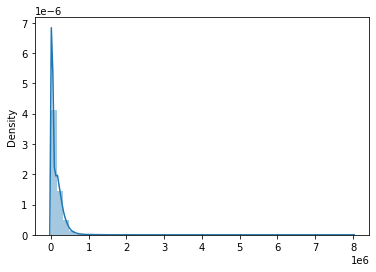

In [29]:
sns.distplot(x=data["tot_cur_bal"])

From above percentiles and distribution it is clear that the data is skewed for this column. So we will impute using the median as 50 percent of data lies below 80k and 50percent above it.

In [30]:
med_tot_cur_bal=data.tot_cur_bal.median()
data.loc[data.tot_cur_bal.isna()==True,"tot_cur_bal"]=med_tot_cur_bal

total_rev_hi_lim Column : Total revolving high credit/credit limit

In [31]:
data.total_rev_hi_lim.describe()

count    7.886560e+05
mean     3.216357e+04
std      3.769964e+04
min      0.000000e+00
25%      1.400000e+04
50%      2.380000e+04
75%      3.990000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

<AxesSubplot:ylabel='Density'>

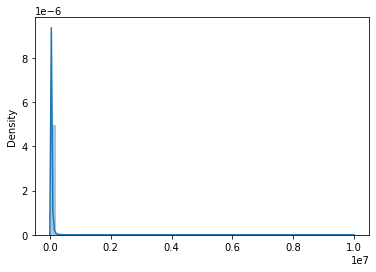

In [32]:
sns.distplot(x=data.total_rev_hi_lim)

In [33]:
perc_tot_rev_hi_lim_75_95=np.nanpercentile(data["total_rev_hi_lim"],[75,80,85,90,95,99,99.5,99.7,99.8,99.9,99.99])
print(perc_tot_rev_hi_lim_75_95)

[ 39900.          45200.          52100.          62600.
  83100.         151800.         195500.         232500.
 268796.28       331934.50000001 652845.59999965]


As we observe that the data is skewed. Also the amount is below 2 lac till 99.5th percentile and it shoots to 3.3 after 99.8 percentile to more than 6lac at 99.99th percentile. Therefore we will use the median instead to impute the value

In [34]:
med_tot_rev_hi_lim=data["total_rev_hi_lim"].median()
data.loc[data.total_rev_hi_lim.isna()==True,"total_rev_hi_lim"]=med_tot_rev_hi_lim

# Check for duplicates

In [35]:
dup_count=data.duplicated().sum()

In [36]:
dup_count

0

In [37]:
data.to_csv("na_treated_data.csv")